# Introduction to programming and numerical analysis - Summer examination 2023

This exam is made by:
- Jacob Grenaa Vestergaard
- Emil Henry Erbas
- Jeppe Vanderhaegen

# Importing essentials

In [11]:
# Importing autoreload
%load_ext autoreload
%autoreload 2

# Importing essential packages
from types import SimpleNamespace
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize_scalar
import tabulate

# Importing the model
from examproject import ClassQ1
from examproject import GriewankOptimizer


# Defining the models in this Notebook
modelQ1 = ClassQ1()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Problem 1

**Question 1.1**

Explain code

In [ ]:
# Values for G
G_values = [1.0,2.0]

for G in G_values:
    modelQ1 = ClassQ1()

    # Assigning values
    modelQ1.par.G = G
    
    # Calling the provided analytical soltion
    L_optimal = modelQ1.par.optimal_L

    # Solving the model
    maximized_L = modelQ1.maximize_utility()
    # Printing the value
    print("When G is equal to",G,", optimal L is", f'{maximized_L[0]:.8f}')    
    
    if np.isclose(maximized_L[0], L_optimal,rtol=1e-3):
            print("In this scenario, the values obtained from the minmizer-solution and analytical-solution are approximately the same.")
    else:
            print("The values are not close.")
    print()

**Question 1.2**

Explain code

In [ ]:
# Define the range of real wage values
omega_values = np.linspace(0.1, 2.0, 100)

# Calculate the corresponding optimal labor supply choices for each wage value
L_star_values = []
for omega in omega_values:

    modelQ1 = ClassQ1()
    modelQ1.par.omega_tilde = (1 - modelQ1.par.tau) * omega
    L_star = modelQ1.optimal_labor_supply()
    L_star_values.append(L_star)

# Plot the relationship between w and L_star
plt.plot(omega_values, L_star_values)
plt.xlabel('Real Wage')
plt.ylabel('Optimal Labor Supply')
plt.title('Optimal Labor Supply vs. Real Wage')
plt.grid(True)
plt.show()   

**Question 1.3**

Explain code

In [ ]:
# Define the range of tau values
tau_values = np.linspace(0.1, 0.9, 100)

# Initialize arrays to store the calculated values
L_values = []
G_values = []
utility_values = []

# Calculate the corresponding L, G, and worker utility for each tau value
for tau in tau_values:
    modelQ1 = ClassQ1()
    modelQ1.par.omega_tilde = (1 - tau) * modelQ1.par.omega
    L_star = modelQ1.optimal_labor_supply()
    G = tau * modelQ1.par.omega * L_star * modelQ1.par.omega_tilde
    utility = np.log((modelQ1.par.kappa + (1 - tau) * modelQ1.par.omega * L_star)**modelQ1.par.alpha * G**(1 - modelQ1.par.alpha)) - modelQ1.par.nu * L_star**2
    L_values.append(L_star)
    G_values.append(G)
    utility_values.append(utility)

# Plot the relationship between tau and L
plt.plot(tau_values, L_values)
plt.xlabel('Tau (Tax Rate)')
plt.ylabel('Labor Supply (L)')
plt.title('Labor Supply vs. Tax Rate')
plt.grid(True)
plt.show()

# Plot the relationship between tau and G
plt.plot(tau_values, G_values)
plt.xlabel('Tau (Tax Rate)')
plt.ylabel('Government Consumption (G)')
plt.title('Government Consumption vs. Tax Rate')
plt.grid(True)
plt.show()

# Plot the relationship between tau and worker utility
plt.plot(tau_values, utility_values)
plt.xlabel('Tau (Tax Rate)')
plt.ylabel('Worker Utility')
plt.title('Worker Utility vs. Tax Rate')
plt.grid(True)
plt.show()

**Question 1.4**

Explain code

In [ ]:
# Define the range of tau values
tau_values = np.linspace(0.01, 1, 100)

# Function to calculate worker utility for a given tau value
def calculate_utility(tau):
    modelQ1 = ClassQ1()
    modelQ1.par.omega_tilde = (1 - tau) * modelQ1.par.omega
    L_star = modelQ1.optimal_labor_supply()
    G = tau * modelQ1.par.omega * L_star * modelQ1.par.omega_tilde
    utility = np.log((modelQ1.par.kappa + (1 - tau) * modelQ1.par.omega * L_star) ** modelQ1.par.alpha * G ** (1 - modelQ1.par.alpha)) - modelQ1.par.nu * L_star ** 2
    return -utility  # We minimize the negative utility to maximize the original utility

# Find the optimal tau using scipy's minimize_scalar function
result = minimize_scalar(calculate_utility, bounds=(0.01, 1), method='bounded')
optimal_tau = result.x
max_utility = -result.fun

print("The socially optimal tax rate maximizing worker utility is tau =", optimal_tau)

# Plot the relationship between tau and worker utility
utility_values = [-calculate_utility(tau) for tau in tau_values]  # Calculate utility for all tau values
plt.plot(tau_values, utility_values)
plt.axvline(x=optimal_tau, color='r', linestyle='--', label='Optimal Tau')
plt.xlabel('Tau (Tax Rate)')
plt.ylabel('Worker Utility')
plt.title('Worker Utility vs. Tax Rate')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Problem 2

# Problem 3

**Question 3.1**

Explain code

Iteration 1: x0 = [84.6207 77.4345], x_best = [84.7805 75.4535]
Iteration 2: x0 = [ -13.8698 -196.2267], x_best = [84.7805 75.4535]
Iteration 3: x0 = [-148.9582   38.443 ], x_best = [84.7805 75.4535]
Iteration 4: x0 = [-518.2725  101.4349], x_best = [84.7805 75.4535]
Iteration 5: x0 = [-314.5227 -407.0921], x_best = [84.7805 75.4535]
Iteration 6: x0 = [-417.457  -447.5169], x_best = [84.7805 75.4535]
Iteration 7: x0 = [-207.0706  232.9846], x_best = [84.7805 75.4535]
Iteration 8: x0 = [-169.2402  469.6388], x_best = [84.7805 75.4535]
Iteration 9: x0 = [-357.7441 -467.277 ], x_best = [84.7805 75.4535]
Iteration 10: x0 = [ 33.0681 441.1864], x_best = [84.7805 75.4535]
Iteration 11: x0 = [-285.7507   -0.7259], x_best = [-100.4807   35.5075]
Iteration 12: x0 = [-85.7227  36.0047], x_best = [-94.2006  35.5075]
Iteration 13: x0 = [  88.7362 -129.7732], x_best = [ -3.14   -48.8229]
Iteration 14: x0 = [-504.5831  440.7372], x_best = [ -3.14   -48.8229]
Iteration 15: x0 = [-402.5957  364.1779],

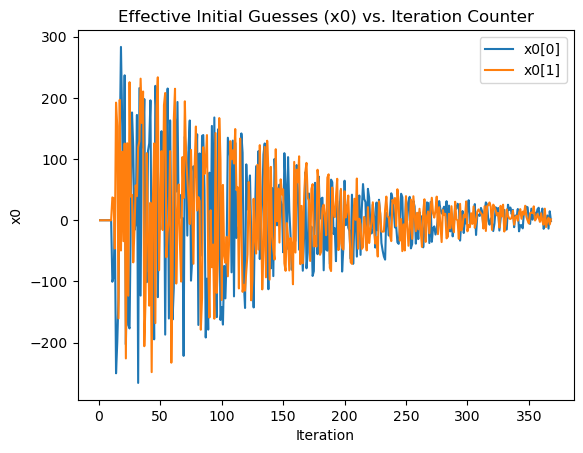

In [10]:
# Create an instance of the GriewankOptimizer class
bounds = [-600, 600]
tol = 1e-8
warmup_iter = 10
max_iter = 1000
optimizer = GriewankOptimizer(bounds, tol, warmup_iter, max_iter)

# Run the optimization
optimizer.run_optimization()

**Question 3.2**

Explain code

In [22]:
import numpy as np
from scipy.optimize import minimize
import tabulate

def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1**2 / 4000 + x2**2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(bounds, tol, warmup_iter, max_iter, seed):
    np.random.seed(seed)
    x_best = None

    for k in range(max_iter):
        x = np.random.uniform(bounds[0], bounds[1], size=2)

        if k >= warmup_iter:
            chi = 0.5 * (2 / (1 + np.exp((k - warmup_iter) / 100)))
            x0 = chi * x + (1 - chi) * x_best
            res = minimize(griewank, x0, method='BFGS', tol=tol)
        else:
            res = minimize(griewank, x, method='BFGS', tol=tol)

        x_best = res.x if k == 0 or res.fun < griewank(x_best) else x_best

        if griewank(x_best) < tol:
            break

    return x_best, k+1

# Settings
bounds = [-600, 600]
tol = 1e-8
max_iter = 1000
K_values = [10,100]
seed_values = [2000, 2001, 2002, 2003, 2004]  # Different seed values to iterate over

# Table headers
headers = ["Seed", "K", "Convergence Iterations", "x_best", "f(x_best)"]

# Table rows
table = []

for seed in seed_values:
    for K in K_values:
        # Run optimizer with current K and seed
        warmup_iter = K
        result, iterations = refined_global_optimizer(bounds, tol, warmup_iter, max_iter, seed)
        f_x_best = griewank(result)

        # Append row to the table
        table.append([seed, K, iterations, result.round(4), f_x_best])

# Print the table
print(tabulate.tabulate(table, headers=headers, tablefmt="grid"))


+--------+-----+--------------------------+-----------+-------------+
|   Seed |   K |   Convergence Iterations | x_best    |   f(x_best) |
+========+=====+==========================+===========+=============+
|   2000 |  10 |                      368 | [-0. -0.] | 0           |
+--------+-----+--------------------------+-----------+-------------+
|   2000 | 100 |                      417 | [-0. -0.] | 0           |
+--------+-----+--------------------------+-----------+-------------+
|   2001 |  10 |                      208 | [-0. -0.] | 0           |
+--------+-----+--------------------------+-----------+-------------+
|   2001 | 100 |                      443 | [-0. -0.] | 0           |
+--------+-----+--------------------------+-----------+-------------+
|   2002 |  10 |                      355 | [-0. -0.] | 0           |
+--------+-----+--------------------------+-----------+-------------+
|   2002 | 100 |                      458 | [-0. -0.] | 1.11022e-16 |
+--------+-----+----